In [1]:
'''准备数据'''
import numpy as np
from sklearn.cross_decomposition import PLSRegression
from sklearn import datasets

iris = datasets.load_iris()  # 从数据库中获取数据
data, target = iris.data, iris.target  # 获取自变量；样本的分类信息
X, y = data[target!=2], target[target!=2]  # 取鸢尾花的前两类

ally = []
for i in range(len(y)):  # 转正交编码
    oneY = [0,1] if y[i]==1 else [1,0]
    ally.append(oneY)
Y = np.array(ally)

In [2]:
'''建模 获取训练集得分'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2)
pls = PLSRegression(n_components=2, scale=True)
pls.fit(X_train, y_train)

yTrainType = []
for item in y_train:
    yTrainType.append(np.argmax(item))  # 最大值对应的下标
yTrainType = np.array(yTrainType)
T = pls.x_scores_

In [3]:
'''计算测试集得分'''
xavg, xstd = X_train.mean(axis=0), X_train.std(axis=0)
X_test = (X_test - xavg) / xstd  # 数据预处理
Tpred = None  # 记录测试集得分
for i in range(2):
    t = X_test.dot(pls.x_weights_[:,i])
    Tpred = t if Tpred is None else np.c_[Tpred, t]
    X_test -= np.outer(t, pls.x_loadings_[:,i])
yTestType = []  # 整理测试集样本的类别
for item in y_test:
    yTestType.append(np.argmax(item))

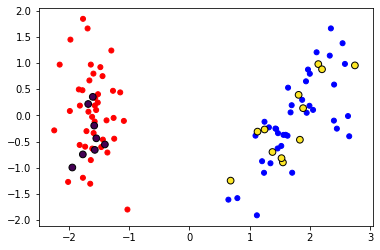

In [9]:
'''制作散点图'''
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

ax = plt.subplot(1,1,1)
# 画训练集点
ax.scatter(T[:,0],T[:,1],c=yTrainType,cmap=cm_bright,s=25)
# 画测试集点
ax.scatter(Tpred[:,0],Tpred[:,1],c=yTestType,edgecolors='black',s=45)

In [10]:
'''得分网络模拟'''
# 堆叠概率等高线图，从二维得分空间转化到原始空间，设残差矩阵为0
x_min, x_max, y_min, y_max = T[:,0].min()-.5, T[:,0].max()+.5, T[:,1].min()-.5, T[:,1].max()+.5
h = .2

xx, yy = np.meshgrid(np.arange(x_min, x_max,h), np.arange(y_min, y_max,h))

Tmoni = np.c_[xx.ravel(), yy.ravel()]
Xmoni = Tmoni.dot(pls.x_loadings_.T)  # 转换到原始变量空间
Xmoni += xavg
Xmoni *= xstd
ymoniPred = pls.predict(Xmoni)
exp = np.exp(ymoniPred)
sumExp = np.sum(exp, axis=1, keepdims=True)
softmax = exp/sumExp  # 转每类的概率
Z = softmax[:,0]

In [11]:
'''制作概率的等高线图'''
Z = Z.reshape(xx.shape)
CS = ax.contour(xx,yy,Z,6,colors='k')
ax.clabel(CS, fontsize=9,inline=1)

<a list of 5 text.Text objects>